In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:

#constants
N=100
h = 1
m = 1
dx = 0.1
dt = .0001

#set x
x = np.linspace(-dx*N/2,dx*N/2, num=N)

#set potential
l=1/4
a=2.5
v = l*(x**2-a**2)**2


#form operators
V = np.diag(v)

c_1 = -h/(2*m*dx**2)
c_2 = 1/h

D2 = -2*np.diag(np.ones(N)) + np.diagflat(np.ones(N-1), 1) + np.diagflat(np.ones(N-1), -1)


#Newtons Method Op
Op = c_1 * D2 + c_2 * V

#Hamiltonian
H = h*c_1*D2 + V

#energies and eigenstates

energy, eigstate = np.linalg.eigh(H)
eigstate = eigstate.T

for i, state in enumerate(eigstate):
    eigstate[i] = state / np.sum(state**2*dx)


In [7]:
def newton(real, imag):
    real_new = real + dt * Op@imag
    imag_new = imag - dt * Op@real
    return real_new, imag_new


class State:
    def __init__(self, real, imag):

        self.real = real
        self.imag = imag
        self.normalize()
        self.prob = np.square(self.real) + np.square(self.imag)
        


    def normalize(self):
        norm = np.sqrt(np.sum((np.square(self.real)+np.square(self.imag))*dx))
        self.real = self.real / norm
        self.imag = self.imag / norm

    def plot(self):
        plt.figure()
        plt.ylim(-1,1)
        plt.plot(x,self.real,'r')
        plt.plot(x,self.imag,'b')
        plt.plot(x,self.prob,'g')
        plt.show()
    def save(self, path):
        plt.figure()
        plt.ylim(-1,1)
        plt.plot(x,self.real,'r')
        plt.plot(x,self.imag,'b')
        plt.plot(x,self.prob,'g')
        plt.savefig(f'pngstack/{path}.png')
        plt.close()

KeyboardInterrupt: 

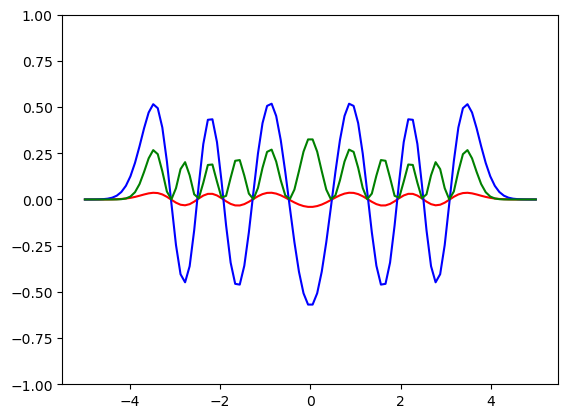

In [8]:
state = State(eigstate[10], np.zeros(x.shape[0]))

data = [state]

for step in range(100000):
    real, imag = newton(state.real,state.imag)
    state = State(real, imag)
    if step % 100 == 0 and step > 0:
        data.append(state)
        state.save(step*dx)

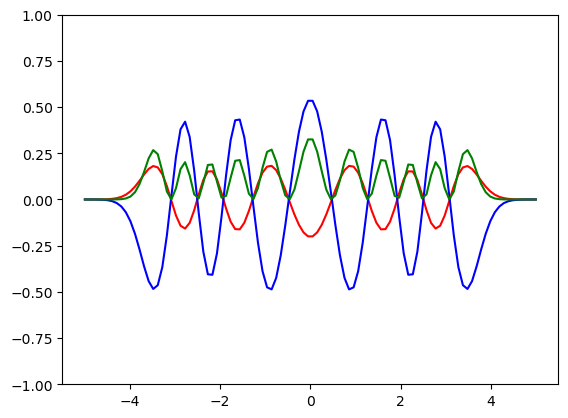

In [ ]:
data[8].plot()